In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

### 학교 당 반 차이 평균

In [ ]:
class_diff_all = pd.read_csv('./class_diff_all.csv')

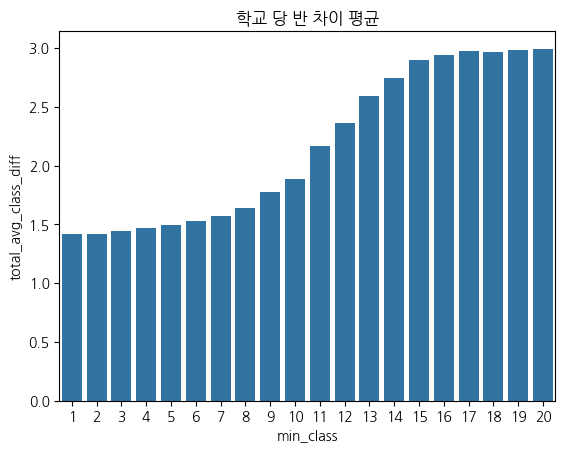

In [16]:
ax = sns.barplot(data=class_diff_all, x='min_class', y='total_avg_class_diff')
ax.set_title('학교 당 반 차이 평균')
plt.show()

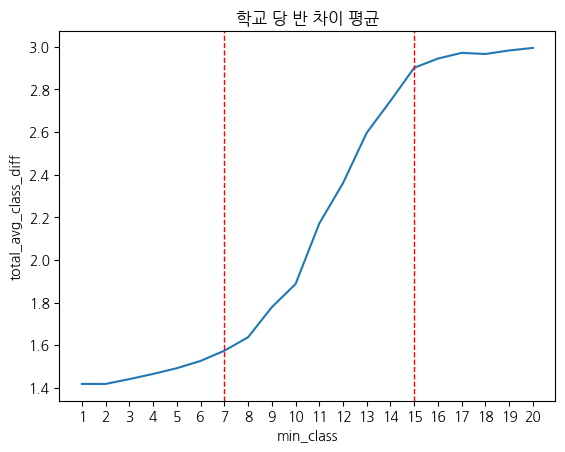

In [24]:
ax = sns.lineplot(data=class_diff_all, x='min_class', y='total_avg_class_diff')
ax.axvline(x=7, color='red', linestyle='--', linewidth=1)
ax.axvline(x=15, color='red', linestyle='--', linewidth=1)
ax.set_xticks(range(1, 21))
ax.set_title('학교 당 반 차이 평균')
plt.show()

### 반 인원 히스토그램

In [25]:
class_count_all = pd.read_csv('./class_count_all.csv')

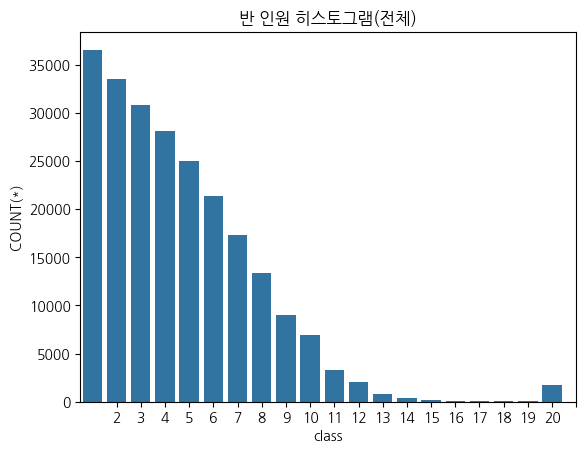

In [41]:
ax = sns.barplot(data=class_count_all, x='class', y='COUNT(*)')
ax.set_title('반 인원 히스토그램(전체)')
ax.set_xticks(range(1, 21))
plt.show()

### 구매부터 취소까지 걸리는 평균

In [130]:
all_buy_history = pd.read_csv('./all_buy_history.csv')
all_buy_history['created_at'] = pd.to_datetime(all_buy_history['created_at'])

In [46]:
all_buy_history.loc[1]

id                          13794
productId              heart.4000
phone_type                      I
created_at    2023-05-15 01:50:06
user_id                  833041.0
status                          s
Name: 1, dtype: object

In [108]:
all_buy_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95303 entries, 0 to 95302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95303 non-null  int64         
 1   productId   95196 non-null  object        
 2   phone_type  95303 non-null  object        
 3   created_at  95303 non-null  datetime64[ns]
 4   user_id     95303 non-null  int64         
 5   status      95303 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.4+ MB


In [135]:
new_buy_history = all_buy_history.copy()
new_buy_history = new_buy_history[(new_buy_history['productId'].isnull()) | (new_buy_history['status'] == 's')]
new_buy_history.reset_index(inplace=True)

In [115]:
new_buy_history.iloc[56299 - 1: 56299 + 1]

,index,id,productId,phone_type,created_at,user_id,status
56298,56332,46993,heart.777,A,2023-05-21 05:03:42,1322638,s
56299,56333,60,NaN,I,2023-05-19 13:38:05,1322662,f


In [117]:
new_buy_history

,index,id,productId,phone_type,created_at,user_id,status
0,0,5919,heart.4000,I,2023-05-14 07:59:46,833041,s
1,1,13794,heart.4000,I,2023-05-15 01:50:06,833041,s
2,2,51467,heart.777,I,2023-05-21 23:55:46,834112,s
3,3,86,NaN,I,2023-05-21 23:55:48,834112,f
4,4,91075,heart.777,I,2023-06-10 14:17:45,835815,s
...,...,...,...,...,...,...,...
95242,95298,97936,heart.200,A,2024-03-28 13:58:23,1583445,s
95243,95299,97924,heart.777,A,2024-03-26 13:37:40,1583450,s
95244,95300,97925,heart.777,A,2024-03-27 05:36:38,1583454,s
95245,95301,97926,heart.777,A,2024-03-27 05:37:02,1583454,s


In [136]:
times = []
noise_times = []
remove_buy_history = []

for i in range(len(new_buy_history)):
    if new_buy_history.iloc[i]['status'] == 'f':
        if new_buy_history.iloc[i]['user_id'] != new_buy_history.iloc[i-1]['user_id']:
            print(i)
            noise_times.append(i)
        else:
            time_diff = new_buy_history.iloc[i]['created_at'] - new_buy_history.iloc[i-1]['created_at']
            times.append(time_diff)
            remove_buy_history.append(i)
            remove_buy_history.append(i-1)

times

56299
76236


[Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:07'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:03'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedel

In [137]:
# 구매부터 취소까지 걸리는 평균
np.mean(times)

Timedelta('0 days 00:13:56.742857142')

In [138]:
all_drop_idx = remove_buy_history + noise_times

In [139]:
len(remove_buy_history), len(noise_times), len(all_drop_idx)

(210, 2, 212)

In [140]:
all_drop_idx.sort()

### 유저 당 총 구매 기록

In [142]:
new_buy_history.drop(all_drop_idx, inplace=True)
new_buy_history.reset_index(inplace=True)

In [143]:
new_buy_history[new_buy_history['status'] == 'f']

,level_0,index,id,productId,phone_type,created_at,user_id,status


In [153]:
new_buy_history['hearts'] = new_buy_history['productId'].apply(lambda x: int(x.split('.')[-1]))
total_hearts = new_buy_history.groupby('user_id')['hearts'].sum().reset_index()
total_hearts.sort_values(by='hearts', ascending=False)

,user_id,hearts
17648,1141603,75977
19703,1167602,56777
24383,1216899,49977
15367,1111139,44777
27733,1246471,42977
...,...,...
13402,1084218,200
13370,1083594,200
12621,1071483,200
13146,1079886,200
